# **Plant Health Monitoring - ETL Pipeline**


Structured ETL pipeline to clean, transform, and enrich the plant health dataset from Kaggle.
Includes multi-level stress encoding (binary, zone-based, interaction effects) and visualizations.


## Objectives

The underlying goal of this project is to promote plant health in order to escalate 
deforestation, growth of smart green cities and urban agriculture.

This project is a snapshot of how we use the synthetic dataset available to 
showcase a part of the stated overall idea.

* Identify environmental conditions most associated with plant stress or poor health.
* Determine optimal ranges for variables (e.g., moisture, pH) for healthy plant status.
* Predict plant health status using sensor data (if labeled health status is available)
* Explore seasonal or time-based patterns in sensor data.(Future Outlook)

## Key Questions:

1. What are the typical conditions when plants are in good health?
2. Are there correlations between soil moisture and temperature or light?
3. Can we identify thresholds for variables that signal poor plant health?
4. How do different variables vary over time or across different sensors?

## **Hypotheses**

Hypothesis 1: Plants exposed to combined abiotic and biotic stressors experience higher health risks.  
Hypothesis 2: Biotic stressors cause a more significant health decline compared to abiotic stressors.  
Hypothesis 3: Plants in optimal moisture, temperature, and humidity zones show better health outcomes.  


## Inputs

*Dataset Overview*

* Dataset URL: https://www.kaggle.com/datasets/ziya07/plant-health-monitoring/data
* Description: Contains sensor data (e.g., temperature, humidity, moisture, pH, NPK values, light intensity) to monitor plant health.

* Dataset Summary:  
    - Temperature (°C): Measures ambient temperature around the plant, affecting growth and metabolic processes.  
    - Humidity (%): Indicates the moisture level in the air, crucial for plant transpiration and water intake.  
    - Soil Moisture (%): Represents the water content in the soil, directly influencing root health and nutrient absorption.  
    - Soil pH: Captures soil acidity or alkalinity, which impacts nutrient availability.
    - Nutrient Level: A synthetic index reflecting the presence of essential nutrients available to the plant.
    - Light Intensity (lux): Measures light exposure, critical for photosynthesis and plant development.
    - Health Score: A general index (0–100) of plant health, based on environmental factors, soil properties, and other simulated conditions.
    - Health Status: A binary classification (0 = Unhealthy, 1 = Healthy) indicating overall plant health based on the Health Score.

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os

current_dir = os.getcwd()
current_dir

'c:\\Users\\baner\\OneDrive\\Documenti\\data_analytics_AI\\assessment_uno\\Final\\plant_health-monitor\\plant_health-monitor\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\baner\\OneDrive\\Documenti\\data_analytics_AI\\assessment_uno\\Final\\plant_health-monitor\\plant_health-monitor'

---


## Workflow for Extracting dataset using Kaggle API token

The following code underneath is for a quick reference to the user in order
to download the dataset using Kaggle API token

In [4]:
# python -m venv venv # creates a folder venv with a clean python environment
# Feel free to remove any existing environment using rm -rf 'dir' to avoid
# conflicts

# source venv\Scripts\activate # for Windows

# pip install -r requirements.txt # install dependencies
# (Note: do not check this box when you create your env using GUI)

# pip freeze > requirements.txt # Save Requirements


# Setup Kaggle API

# Get Your Kaggle API Key

# Go to: https://www.kaggle.com/account
# Click Create New API Token → It downloads kaggle.json

# Move kaggle.json to Correct Folder

# mkdir -p ~/.kaggle # make a hidden parent directory

# mv kaggle.json ~/.kaggle/ # move the kaggle.json token you created in the above hidden folder

# chmod 600 ~/.kaggle/kaggle.json # for security, only the owner gets access to read and write

# Download Dataset using Kaggle API

# kaggle datasets download -d ziya07/plant-health-monitoring -p .input/data --unzip

## Environment Setup

In [5]:
# Create environment
# source/Scripts/activate
# pip install -r requirements.txt
# pip freeze > requirements.txt

# Set paths
raw_path = "data/raw/plant_moniter_health_data.csv"
cleaned_path = "data/cleaned/plant_moniter_health_data_cleaned.csv"

# Ensure directories exist
os.makedirs(os.path.dirname(raw_path), exist_ok=True)
os.makedirs(os.path.dirname(cleaned_path), exist_ok=True)


# Extract

Section 1 content

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load dataset
df = pd.read_csv(raw_path)
df.head(10)

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1
5,Plant_6,24.297589,63.934854,48.199406,5.832259,55.925673,16177.303643,88.371545,1
6,Plant_7,29.737638,68.951932,45.018082,6.743018,22.956084,23145.447953,76.788410,1
7,Plant_8,27.302304,66.351718,32.743671,5.726348,43.701154,21463.324463,64.143743,0
8,Plant_9,23.591577,70.495527,54.888685,7.041346,45.117262,17797.300034,91.400678,1
9,Plant_10,26.627680,54.647648,59.063552,6.264438,56.333268,19575.411088,71.629099,1


In [7]:
# Checking the size of the dataframe
print("Data loaded with shape:", df.shape)

Data loaded with shape: (1000, 9)


In [8]:
# Checking data types for each column in df
df.dtypes

Plant_ID                object
Temperature_C          float64
Humidity_%             float64
Soil_Moisture_%        float64
Soil_pH                float64
Nutrient_Level         float64
Light_Intensity_lux    float64
Health_Score           float64
Health_Status            int64
dtype: object

In [9]:
print(df.head())
print(df.info())

  Plant_ID  Temperature_C  Humidity_%  Soil_Moisture_%   Soil_pH  \
0  Plant_1      26.490142   73.993554        34.872326  5.546096   
1  Plant_2      24.585207   69.246337        42.832220  6.069807   
2  Plant_3      26.943066   60.596304        33.113701  6.293197   
3  Plant_4      29.569090   53.530632        40.380577  7.443844   
4  Plant_5      24.297540   66.982233        16.595780  6.778277   

   Nutrient_Level  Light_Intensity_lux  Health_Score  Health_Status  
0       41.365064         18728.720954     68.859186              0  
1       49.687965         18639.757675     73.690692              1  
2       50.180169         14613.070482     70.579398              1  
3       54.726303         19009.729425     74.520042              1  
4       36.331416         22198.487245     77.858497              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------     

## Descriptive Statistics

Let's start by looking at some basic statistics of the dataset to understand the distribution of the features.

In [10]:
df.describe()

,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.057996,60.708362,45.087513,6.490640,49.507264,19859.787199,79.718435,0.826000
std,2.937648,9.974544,14.751814,0.513566,9.923802,3022.167739,10.250045,0.379299
min,15.276198,30.596114,-0.292682,5.035276,18.232962,11301.458360,52.873874,0.000000
25%,23.057229,53.937583,35.280006,6.131290,43.173950,17918.921580,72.448627,1.000000
50%,25.075902,60.630771,44.996239,6.500092,49.817580,19871.518786,79.452536,1.000000
75%,26.943832,67.288822,54.913730,6.833473,56.391231,21837.340538,86.997451,1.000000
max,36.558194,91.931076,103.893566,8.121546,81.129102,29294.898302,115.290552,1.000000


---

# Transform

Section 2 content

## Data Cleaning

In [11]:
# Missing values per column
print(df.isnull().sum())

Plant_ID               0
Temperature_C          0
Humidity_%             0
Soil_Moisture_%        0
Soil_pH                0
Nutrient_Level         0
Light_Intensity_lux    0
Health_Score           0
Health_Status          0
dtype: int64


### Missing values
If missing values exist:

In [12]:
df.dropna(inplace=True)
df

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1
...,...,...,...,...,...,...,...,...,...
995,Plant_996,24.156699,70.701502,46.162208,6.514229,49.510350,20514.407953,77.021332,1
996,Plant_997,30.393060,59.734787,48.866288,5.461094,57.114106,23457.944310,87.690317,1
997,Plant_998,26.922529,51.181253,26.373591,6.339851,81.129102,16347.788620,74.726109,1
998,Plant_999,23.286463,58.369330,50.012646,7.321689,58.080362,21403.851266,79.948934,1


Or perhaps it would be a better practice to fill the misisng numeric values 
with median

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


We can already see that there're no missing values present in the dataframe,
let's still see a way how we can visualize this

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


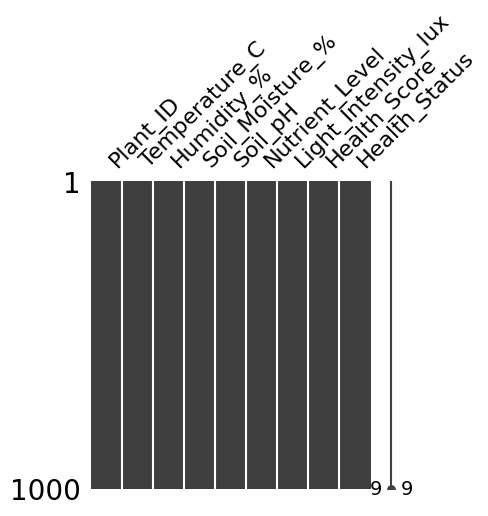

c:\Users\baner\OneDrive\Documenti\data_analytics_AI\assessment_uno\Final\plant_health-monitor\plant_health-monitor\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\baner\OneDrive\Documenti\data_analytics_AI\assessment_uno\Final\plant_health-monitor\plant_health-monitor\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


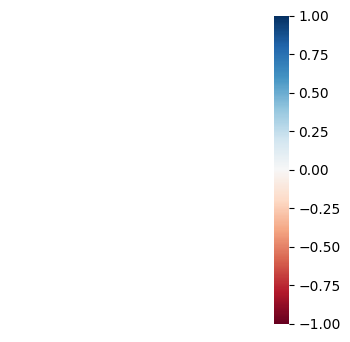

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, figsize=(4, 4))
plt.show()

msno.heatmap(df, figsize=(4, 4))
plt.show()


### Duplicate values
Let's now look if there are duplicates

In [16]:
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")

Duplicates: 0


We see that there are none, however, if there were, how would we drop them off?

In [17]:
# Drop duplicates
df.drop_duplicates(inplace=True)

So, the data is clean and encoded. Let's save the cleaned data now
using the path we had set initially

In [18]:
# Save cleaned data
df.to_csv(cleaned_path, index=False)

Now that we have saved the cleaned dataset, we can load it for the next steps

# Loading

In [19]:
# Load cleaned dataframe
df_cleaned = pd.read_csv(cleaned_path)

# Quick check
df_cleaned.head()

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1


Let's try to plot the outliers now

# Outlier detection

We will use **Boxplots** to visually spot outliers

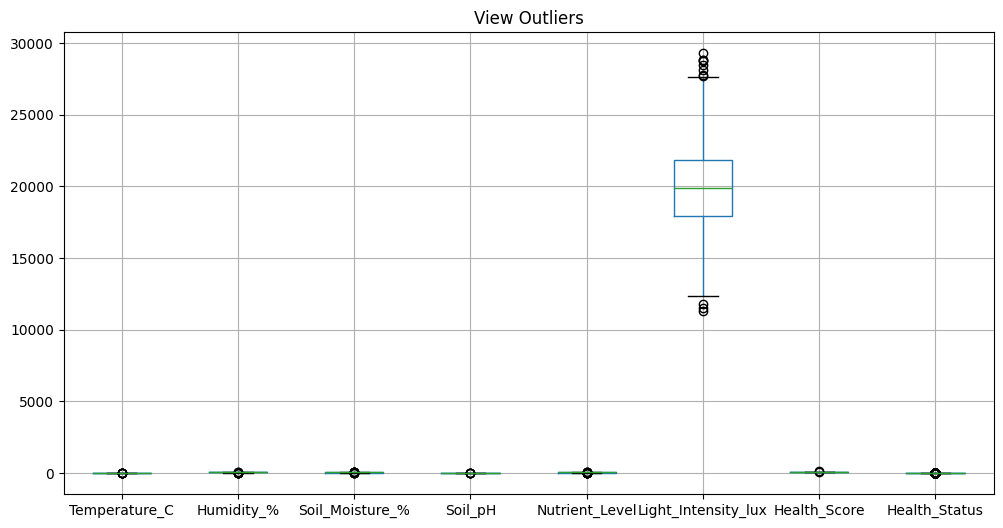

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for all numeric columns
df_cleaned.select_dtypes(include="number").boxplot(figsize=(12, 6))
plt.title("View Outliers")
plt.show()

As we can see from the above plot, no conclusions can be inferred on the columns except Light intensity. This brings us to the next stage of viewing the columns one-by-one or side-by-side.

**One-by-One: Running a for loop on the columns**

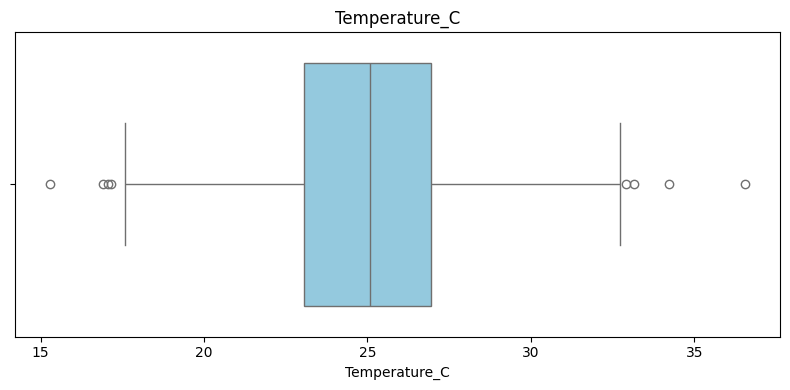

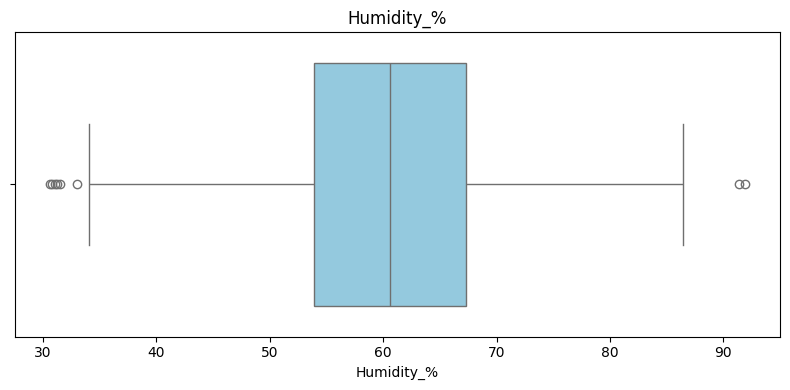

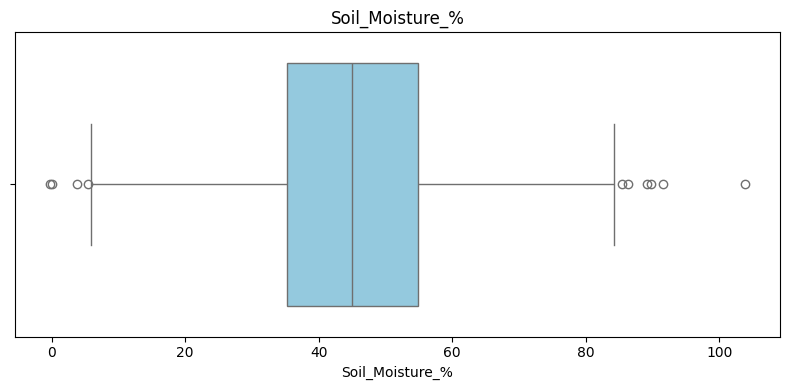

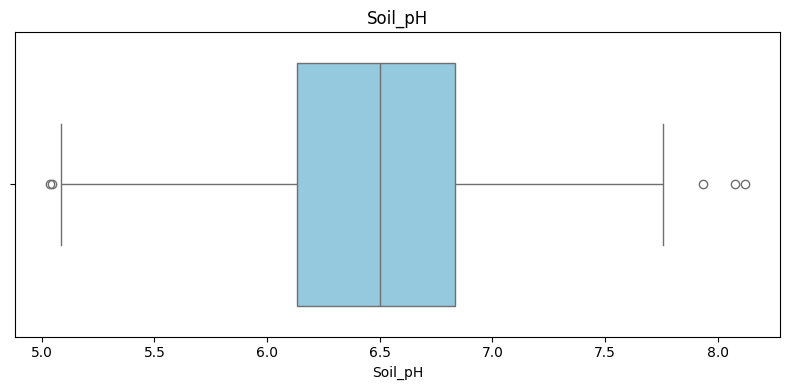

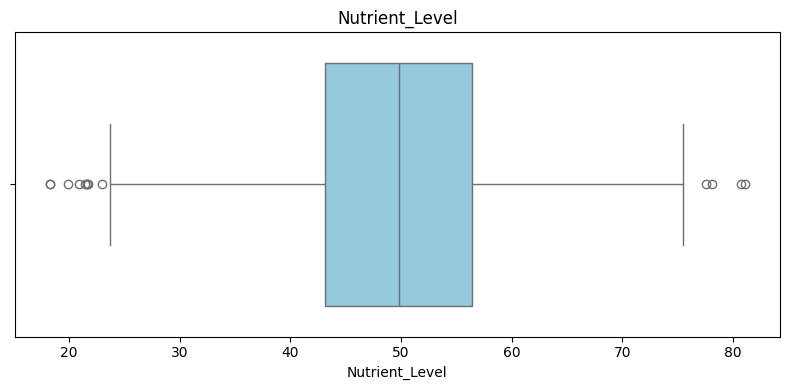

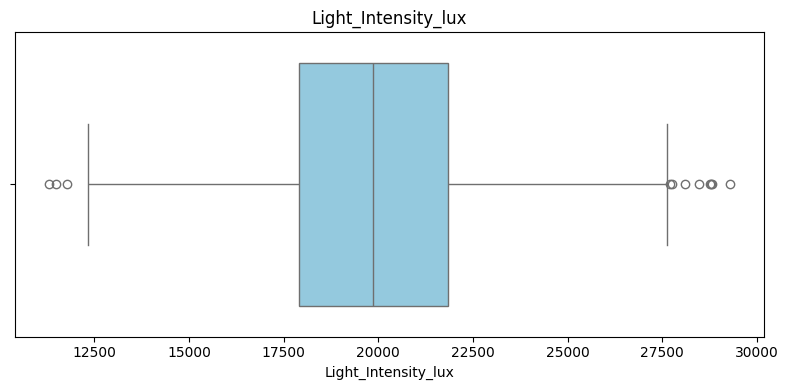

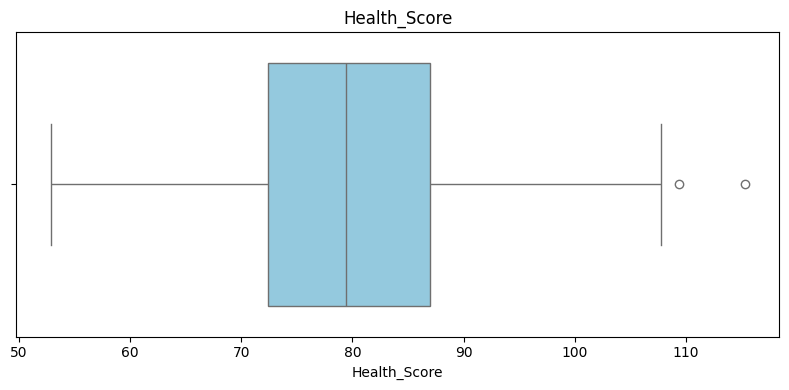

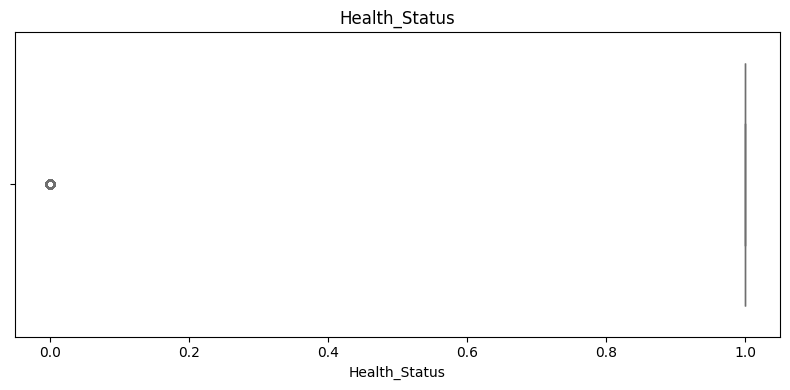

In [21]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns

# Loop through each column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col], color="skyblue")
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Now, for visualizing them as subplots

8


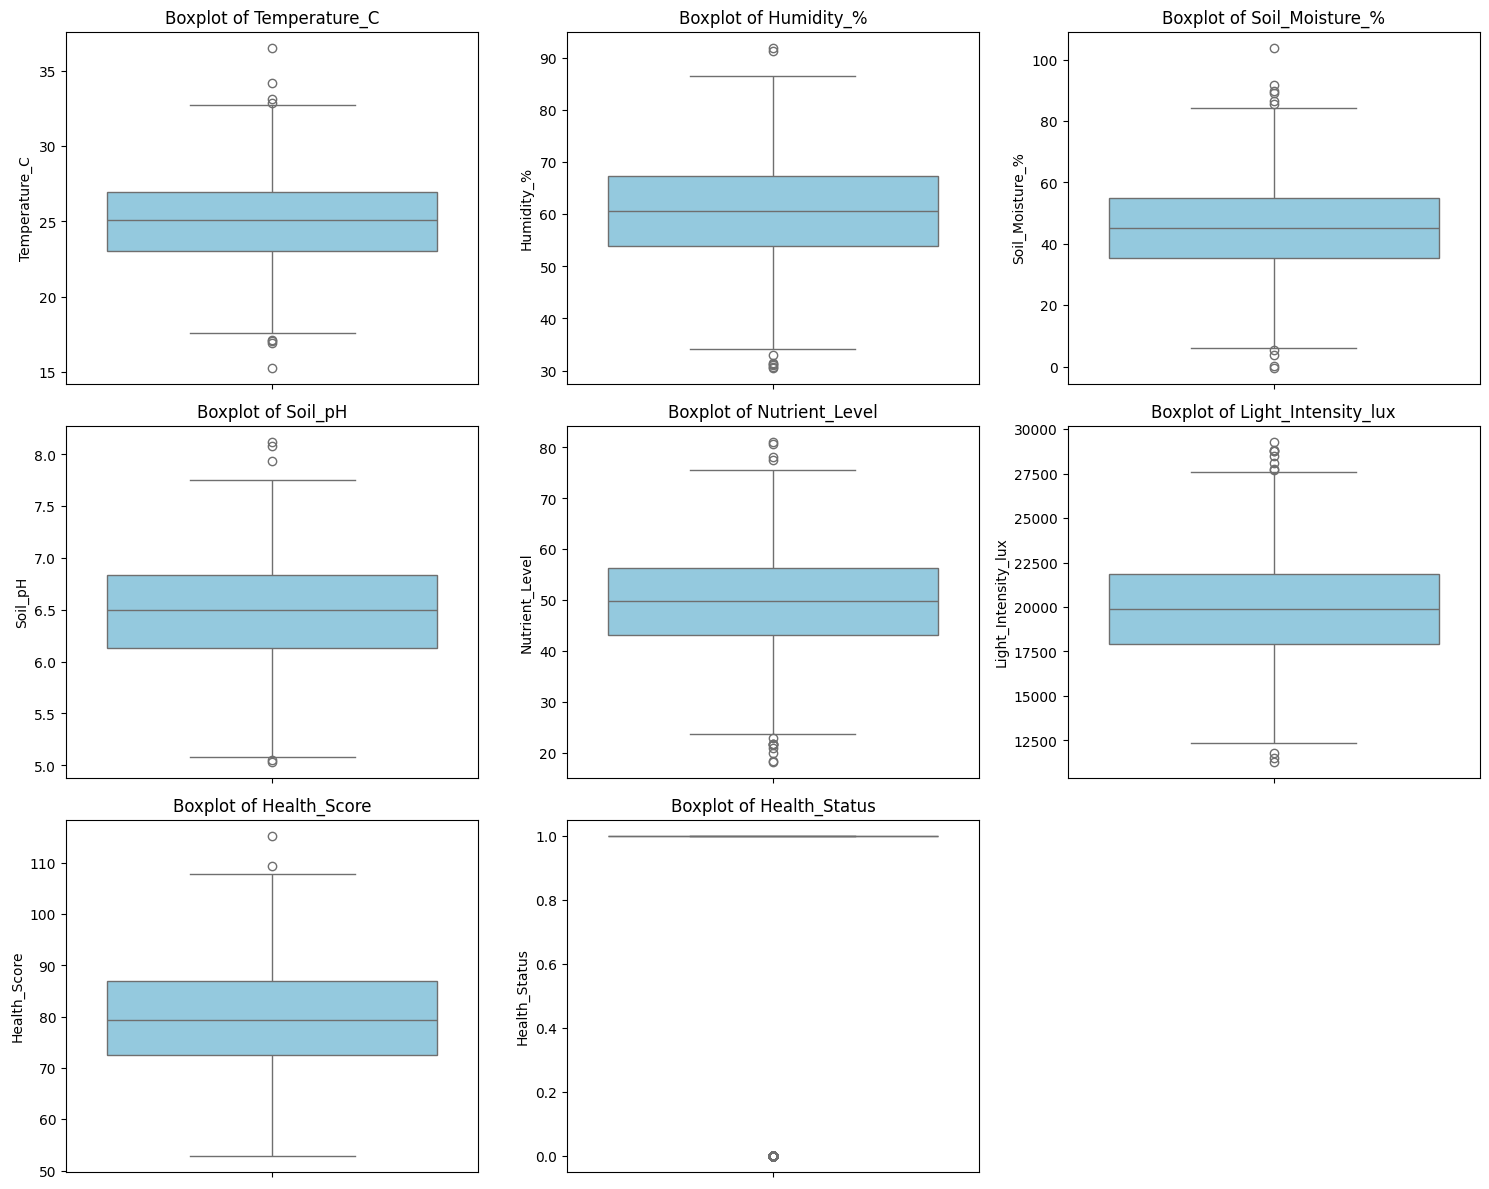

In [22]:
numeric_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()

cols_per_row = 3
num_plots = len(numeric_cols)  # 9/3
print(num_plots)
rows = math.ceil(num_plots / cols_per_row)  # use ceil to round up

# Create subplots
## creates a grid of empty subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))

axes = axes.flatten()  # Flatten to easily index axes

# Plot each boxplot
for i, col in enumerate(numeric_cols):  # gives us index i and col name col
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Turn off unused subplots, in this case, 9 plots for 7 vars: removes 2 extra
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # prevents labesl from overlapping
plt.show()

---

# Feature Engineering & Encoding

The underneath encoded column is just for Testing purposes. 
Note that col Health_Status already implements the binary classifiers for
Healthy and Unhealthy plants

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned["Health_Status_Encoded"] = le.fit_transform(df_cleaned["Health_Status"])
print(df_cleaned[["Health_Status", "Health_Status_Encoded"]].head())

   Health_Status  Health_Status_Encoded
0              0                      0
1              1                      1
2              1                      1
3              1                      1
4              1                      1


In [24]:
df_cleaned.drop("Health_Status_Encoded", axis=1, inplace=True)
df_cleaned.shape

(1000, 9)

In [25]:
# Check again

print(df_cleaned.head())
print(df_cleaned.info())

  Plant_ID  Temperature_C  Humidity_%  Soil_Moisture_%   Soil_pH  \
0  Plant_1      26.490142   73.993554        34.872326  5.546096   
1  Plant_2      24.585207   69.246337        42.832220  6.069807   
2  Plant_3      26.943066   60.596304        33.113701  6.293197   
3  Plant_4      29.569090   53.530632        40.380577  7.443844   
4  Plant_5      24.297540   66.982233        16.595780  6.778277   

   Nutrient_Level  Light_Intensity_lux  Health_Score  Health_Status  
0       41.365064         18728.720954     68.859186              0  
1       49.687965         18639.757675     73.690692              1  
2       50.180169         14613.070482     70.579398              1  
3       54.726303         19009.729425     74.520042              1  
4       36.331416         22198.487245     77.858497              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------     

In [26]:
# Checking with the columns for the next-steps
df.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status'],
      dtype='object')

## Level 1a Encoding: Binary Stress Scores (Individual Impact)

Let's start with encoding individual stress scores and creating a **binary** 
composite score. We will then visualize the  number of plants for each stress
type. 
Next, to improve modularity, we will define a function that does exactly the
same thing.


#### Step 1. Normalize Soil_Moisture_% to Actual Decimal Value

In [27]:
df_cleaned["Soil_Moisture_%"]

0      34.872326
1      42.832220
2      33.113701
3      40.380577
4      16.595780
         ...    
995    46.162208
996    48.866288
997    26.373591
998    50.012646
999    42.671114
Name: Soil_Moisture_%, Length: 1000, dtype: float64

In [28]:
df_cleaned["Soil_Moisture"] = (
    df_cleaned["Soil_Moisture_%"] / 100.0
)  # now in 0.0 - 1.0 format
df_cleaned["Soil_Moisture"]

0      0.348723
1      0.428322
2      0.331137
3      0.403806
4      0.165958
         ...   
995    0.461622
996    0.488663
997    0.263736
998    0.500126
999    0.426711
Name: Soil_Moisture, Length: 1000, dtype: float64

#### Step 2. Define Individual Stress Indicators

##### Moisture Stress

In [29]:
def moisture_stress(moisture):
    return 1 if moisture < 0.3 or moisture > 0.7 else 0

##### pH Stress

In [30]:
def ph_stress(ph):
    return 1 if ph < 6.0 or ph > 7.0 else 0

##### Light Stress

In [31]:
def light_stress(light):
    return 1 if light < 12000 or light > 25000 else 0

##### Nutrient Stress

In [32]:
def nutrient_stress(n):
    return 1 if n < 30 else 0

#### Step 3. Apply all Stress Functions

In [33]:
df_cleaned["Moisture_Stress"] = df_cleaned["Soil_Moisture"].apply(moisture_stress)
df_cleaned["pH_Stress"] = df_cleaned["Soil_pH"].apply(ph_stress)
df_cleaned["Light_Stress"] = df_cleaned["Light_Intensity_lux"].apply(light_stress)
df_cleaned["Nutrient_Stress"] = df_cleaned["Nutrient_Level"].apply(nutrient_stress)

#### Step 4. Create a Composite Stress Score

In [34]:
# Sums values across columns (horizonatlly) for each row ranging 0 - 4

df_cleaned["Total_Stress_L1a"] = df_cleaned[
    ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]
].sum(axis=1)

df_cleaned["Total_Stress_L1a"]

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    0
Name: Total_Stress_L1a, Length: 1000, dtype: int64

To see how many plants have each total stress level

In [35]:
print(df_cleaned["Total_Stress_L1a"].value_counts().sort_index())

Total_Stress_L1a
0    484
1    405
2    102
3      9
Name: count, dtype: int64


In [36]:
df_cleaned.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status', 'Soil_Moisture', 'Moisture_Stress', 'pH_Stress',
       'Light_Stress', 'Nutrient_Stress', 'Total_Stress_L1a'],
      dtype='object')

Check how often each stress occurs individually

In [37]:
# accesses the stress_cols in df, summing the col gives total num of plants
# under that stress

stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]
for col in stress_cols:
    print(f"{col}: {df_cleaned[col].sum()} plants under stress")

Moisture_Stress: 199 plants under stress
pH_Stress: 347 plants under stress
Light_Stress: 56 plants under stress
Nutrient_Stress: 34 plants under stress


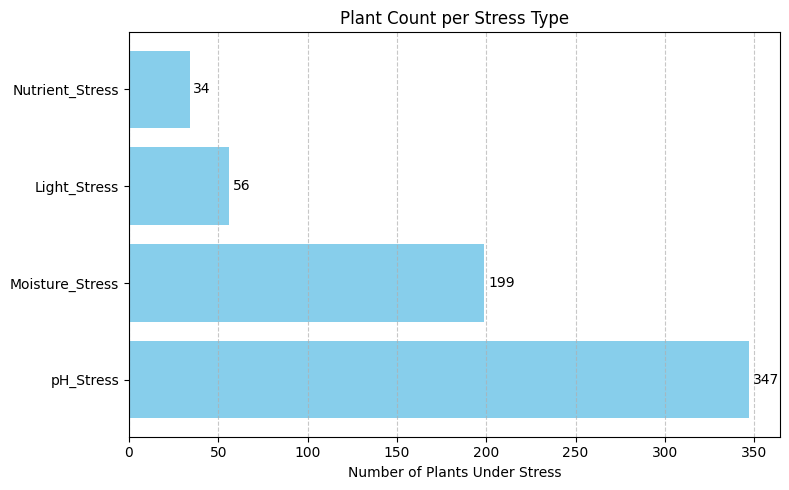

In [38]:
# Define stress columns
stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

# Calculate counts and sort them descending

## dict comprehension: loops over each col in stress_counts, uses .sum() to
## count how many 1s viz. plants are under stress

# key=lambda x: x[1] tells it to sort by the value (the count).
# reverse=True sorts from highest to lowest.
# wraps it back into dict()

stress_counts = {col: df_cleaned[col].sum() for col in stress_cols}

# Gives you both the index (i) and item ((key, value)) from the dictionary
# reverse=True sorts from highest to lowest.
# wraps it back into dict()

sorted_stress = dict(sorted(stress_counts.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(8, 5))
plt.barh(list(sorted_stress.keys()), list(sorted_stress.values()), color="skyblue")
plt.xlabel("Number of Plants Under Stress")
plt.title("Plant Count per Stress Type")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate values
# Gives you both the index(i) and item(key,value) from dict
# value + 2 positions the label right to the bar
# i aligns the text to the correct y-pos of each bar
for i, (key, value) in enumerate(sorted_stress.items()):
    plt.text(value + 2, i, str(value), va="center")

plt.tight_layout()
plt.show()

Let's make the above code snippet more versatile so that we can reuse for any
stress columns

In [39]:
def plot_stress_summary(
    df_cleaned, stress_cols, color="skyblue", title="Plant Count per Stress Type"
):
    """
    Plots a horizontal bar chart of stress counts from the given DataFrame.

    Parameters:
    - df_cleaned: Pandas DataFrame
    - stress_cols: List of column names representing binary stress indicators (0 or 1)
    - color: Color of the bars (default: lightcoral)
    - title: Title of the plot (default: Plant Count per Stress Type)
    """
    # Step 1: Calculate stress counts
    stress_counts = {col: df_cleaned[col].sum() for col in stress_cols}
    print(stress_counts)

    # Step 2: Sort descending
    sorted_stress = dict(
        sorted(stress_counts.items(), key=lambda x: x[1], reverse=True)
    )
    print(sorted_stress)

    # Step 3: Plot
    plt.figure(figsize=(8, 5))
    plt.barh(list(sorted_stress.keys()), list(sorted_stress.values()), color=color)
    plt.xlabel("Number of Plants Under Stress")
    plt.title(title)
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Step 4: Annotate bars with values
    for i, (key, value) in enumerate(sorted_stress.items()):
        plt.text(value + 2, i, str(value), va="center")

    plt.tight_layout()
    plt.show()

{'Moisture_Stress': 199, 'pH_Stress': 347, 'Light_Stress': 56, 'Nutrient_Stress': 34}
{'pH_Stress': 347, 'Moisture_Stress': 199, 'Light_Stress': 56, 'Nutrient_Stress': 34}


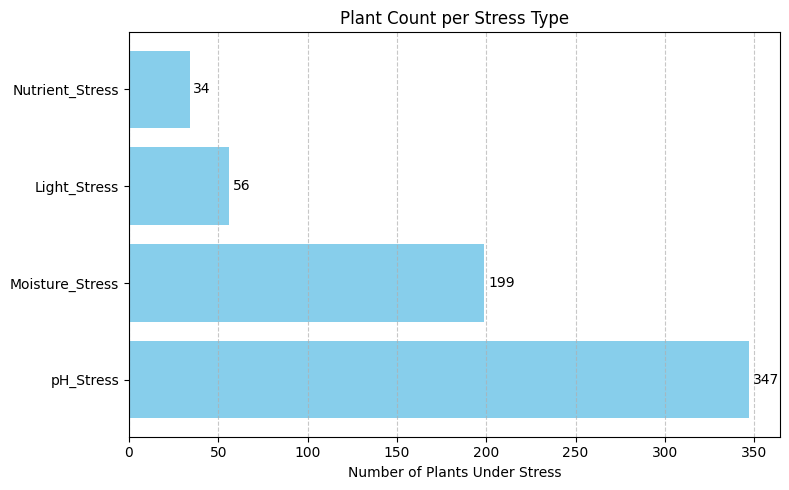

In [40]:
plot_stress_summary(df_cleaned, stress_cols)

*Key Insights*

1. **pH Stress is the most common**
    - ~347 plants are under pH-related stress.
    - Indicates that soil pH levels are outside the optimal range for many 
    plants — this is a critical area to address.

2. **Moisture Stress is also significant**
    - 199 plants are under moisture stress, suggesting watering patterns may 
    need tuning.

3. **Light and Nutrient Stress are less common**
    - Only 56 and 34 plants affected, respectively.
    

Monitoring and balancing soil pH and water retention could significantly 
improve plant health across this dataset.

#### Step 5: Visualize Stresses per Plant 

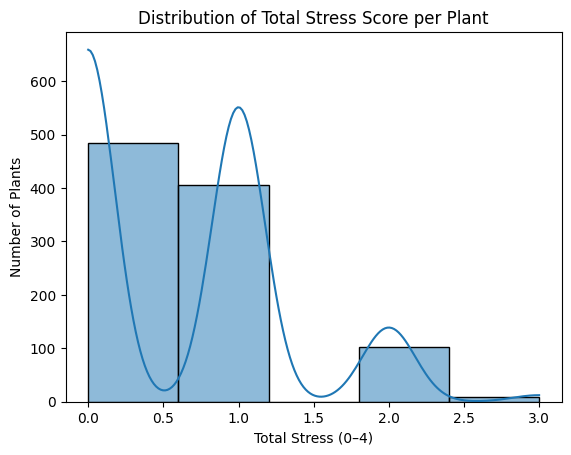

In [41]:
stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

sns.histplot(df_cleaned["Total_Stress_L1a"], bins=5, kde=True)
plt.title("Distribution of Total Stress Score per Plant")
plt.xlabel("Total Stress (0–4)")
plt.ylabel("Number of Plants")
plt.show()


*Key Insights*

1. **Most plants have low stress scores**
    - A large number of plants have a score of 0 or 1
    - This indicates that majority of plants are either not stressed or only
    mildly stressed

2. **A small group of plants is under moderate to high stress (2-3)**
    - There's a visible tail with plants experiencing multiple simultaneous 
    stressors, which may need further intervention

3. **KDE suggests a bimodal pattern**
    - There’s one large peak around 0–1 (healthy or mildly stressed) and a 
    small bump around score 2.
    - Suggests two distinct populations: mostly healthy, and a small 
    vulnerable group.

    
**!Thought!**

Now, it would be also nice to go a step further, and look at the effect of 
**Microclimatic variables**, **Biotic** and **Abiotic** stress factors, their 
possible combinations, following cration of stress fingerprints per plant. And
finally correlate them with Plant Health.

## Level 1b  Encoding: Grouped effect (Microclimatic, Biotic and Abiotic stressors)

Let's group the microclimatic variables and take a look at their effect on 
Plant health status.

In [42]:
microclimate_vars = [
    "Temperature_C",
    "Humidity_%",
    "Soil_Moisture_%",
    "Light_Intensity_lux",
]

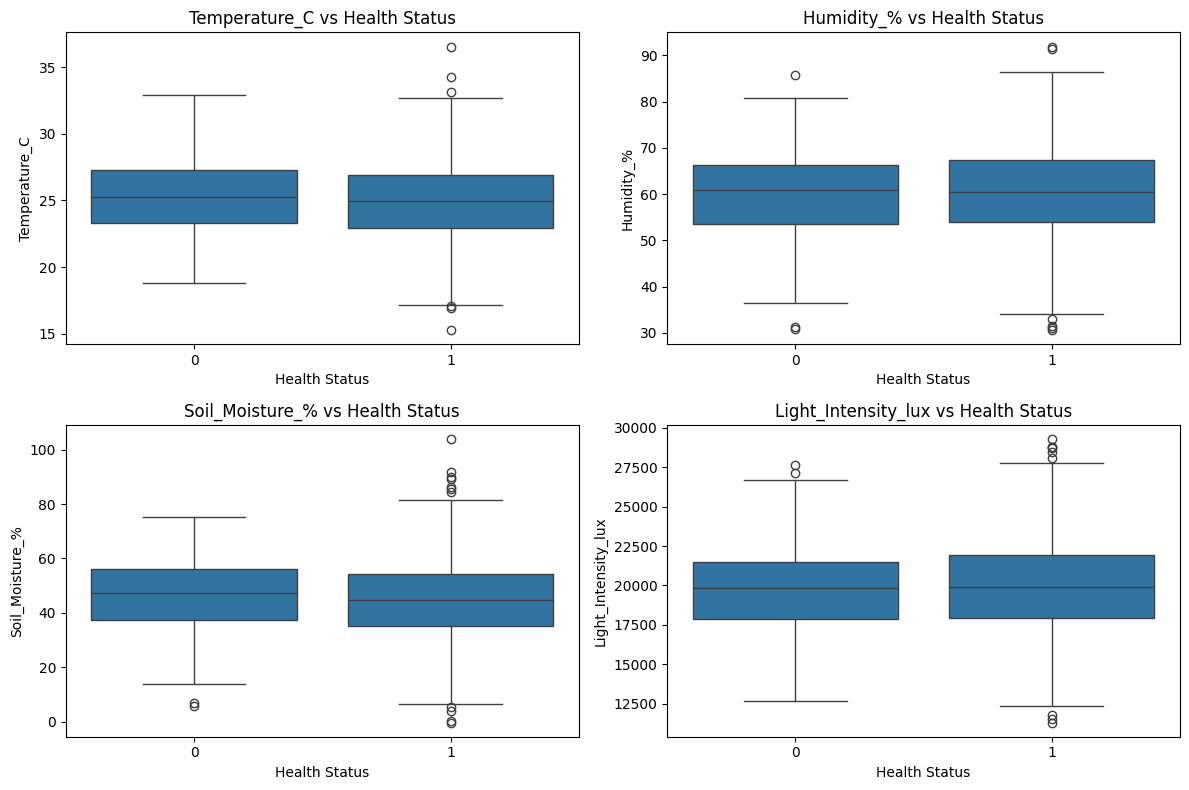

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(microclimate_vars):
    sns.boxplot(x="Health_Status", y=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f"{col} vs Health Status")
    axes[i].set_xlabel("Health Status")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

*Key Insights*

1. Temperature does not significantly differentiate plant health 
in this dataset.

2. Healthy plants seem to tolerate a wider range of humidity.
    - The median is slightly higher for healthy plants
    - Humidity seems weakly associated with health; not a major predictor here.

3. Noticeable difference in spread observed on the effect of Soil moisture on health
    - Unhealthy plants have more extreme low moisture outliers (down to ~5–10%)
    - Low soil moisture appears linked to unhealthiness.

4. Light intensity may not have a direct impact, or the relationship is 
nonlinear (too low or too high being harmful). 
    - Both distributions are very similar in terms of median and IQR.

Now let's also analyze the direct correlation (linear) to plant health

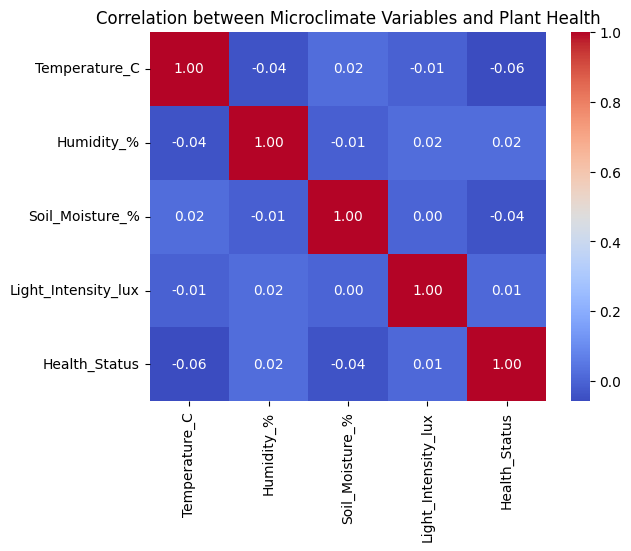

In [44]:
# Create side-by-side boxplots comparing microclimate variables across health status
cols_to_corr = microclimate_vars + ["Health_Status"]

sns.heatmap(df_cleaned[cols_to_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Microclimate Variables and Plant Health")
plt.show()

*Key Insights*

1. **Temperature has the strongest (but still weak) correlation**
    - Negative: may hint that higher temps slightly reduce plant health, 
    but it’s not decisive

2. **Soil Moisture correlation is slightly negative**, which contradicts what we
 saw in boxplots

    - Why? Because correlation only measures linearity — perhaps it misses 
    threshold or non-linear patterns.

3. Humidity has a very weak positive correlation and light intensity has almost
no correlation.

Direct correlation only detects linear trends. Whereas Microclimatic stress
may cause nonlinear, cumulative or interaction effects (e.g. heat + dryness =
worse?)

- We will look at a deeper correlation in Future Outlook

For the moment, let's see how variables interact visually, and if sick plants 
cluster.

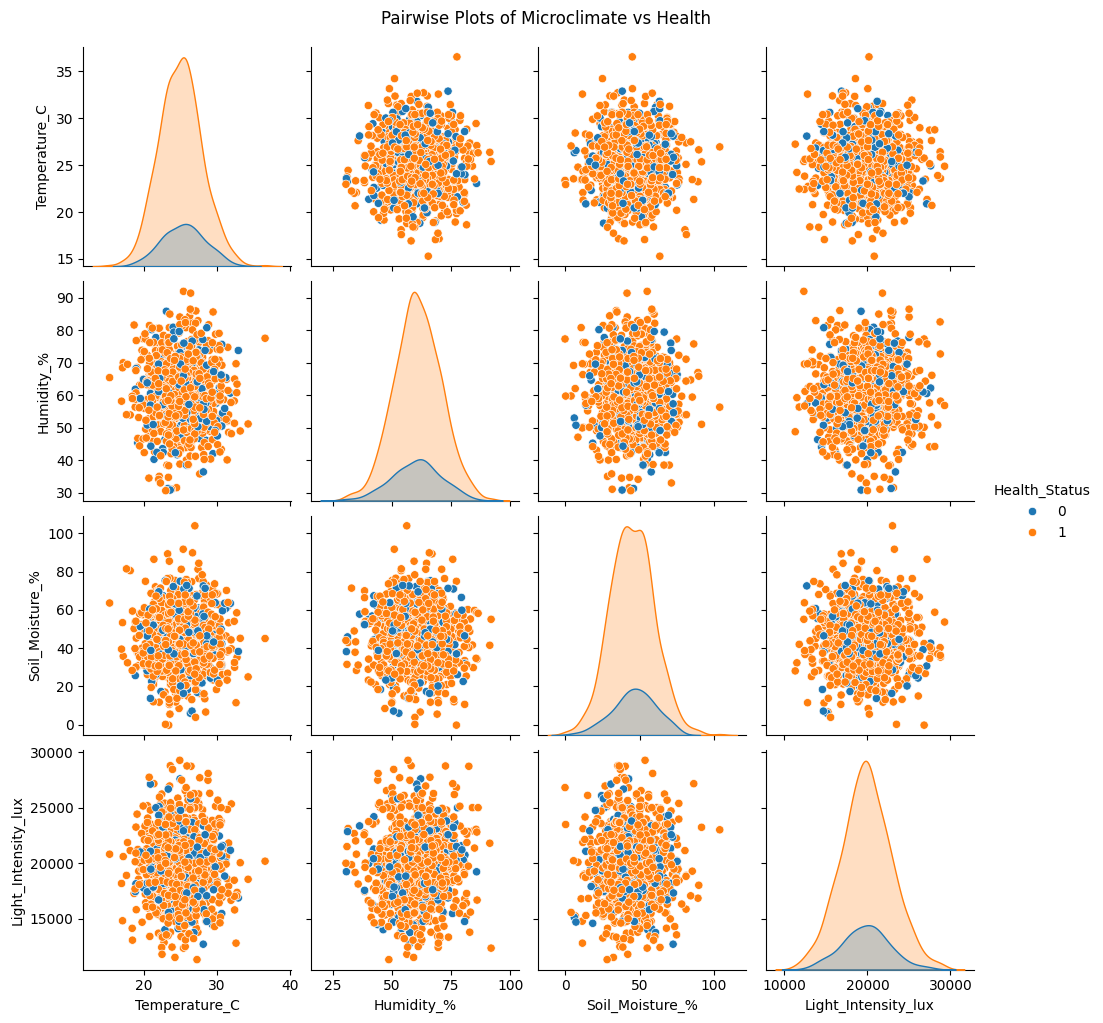

In [45]:
sns.pairplot(df_cleaned, vars=microclimate_vars, hue="Health_Status")
plt.suptitle("Pairwise Plots of Microclimate vs Health", y=1.02)
plt.show()

*Interpretation*

- Temperature_C
    - Healthy plants (orange) dominate the normal range (~24–30°C).
    - Unhealthy (blue) is much fewer, and clustered in cooler zones (~18–24°C).

- Humidity_%:
    - Distributions of healthy and unhealthy are very similar.

- Soil_Moisture_%
    - Again, quite similar, but unhealthy plants dip more often at 
    very low moisture.
    - **Confirms Dry soil affects plant health** in some edge cases

- Light_Intensity_lux
    - Similar distributions
    - Light alone doesn't strongly distinguish plant health.


- From most scatterplots, no strong pairwise relationship found
- Some plots like **Soil_Moisture_% vs Temperature_C may show a slight clustering**,
 but it's subtle.

Conclusion: Relationship might be **nonlinear or multi-factorial**

**We also aim to categorize other stressors to have a clear indication of the 
Biotic and Abiotic stress flags contributing to the stress fingerprint**

##### Step 1. Confirm the Stress columns according to the desired groups

In [46]:
abiotic_stress = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

Since the biotic stress flags are not present in the original dataset, we can
simulate the stressors using biologically grounded logic.

Let's create a function for disease, where
- If both humidity and temperature are in risky ranges as specified:
    - 60% chance of no disease (0)
    - 40% chance of disease (1)

- Otherwise for normal or dry/cold climate:
    - 95% chance of no disease (0)
    -  5% chance of disease (1) 

Scientific Logic: Warm and moist environments are ideal for fungal diseases 
(like powdery mildew or leaf spots), so we simulate higher chance under these 
conditions.

In [47]:
def simulate_disease(row):
    # High humidity + moderate temp increase fungal disease risk
    if row["Humidity_%"] > 70 and 20 <= row["Temperature_C"] <= 30:
        return np.random.choice([0, 1], p=[0.4, 0.6])
    else:
        return np.random.choice([0, 1], p=[0.95, 0.05])

Similarly, we will create a function for pest, where
- If both nutrient-deficient plants and high heat are in the trigger zone:
    - 30% chance of pest infestation (1)

- else:
    -  5% chance of pest (1) 

Scientific Logic: Weakened or overheated plants are more prone to pest attacks 
(aphids, mites, etc.), so the risk is simulated as higher.

In [48]:
def simulate_pest(row):
    # Low nutrients or excessive heat increase pest vulnerability
    if row["Nutrient_Level"] < 30 or row["Temperature_C"] > 35:
        return np.random.choice([0, 1], p=[0.3, 0.7])
    else:
        return np.random.choice([0, 1], p=[0.95, 0.05])

In [49]:
df_cleaned["Disease_Presence"] = df_cleaned.apply(simulate_disease, axis=1)
df_cleaned["Pest_Infestation"] = df_cleaned.apply(simulate_pest, axis=1)

# Biotic stress columns (simulated)
biotic_stress = ["Disease_Presence", "Pest_Infestation"]

print(df_cleaned[abiotic_stress + biotic_stress].head())

   Moisture_Stress  pH_Stress  Light_Stress  Nutrient_Stress  \
0                0          1             0                0   
1                0          0             0                0   
2                0          0             0                0   
3                0          1             0                0   
4                1          0             0                0   

   Disease_Presence  Pest_Infestation  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  


#### Step 2. Create Stress Scores

In [50]:
# Number of abiotic stressors (0–4)
df_cleaned["Abiotic_Stress_Score"] = df_cleaned[abiotic_stress].sum(axis=1)

# Number of biotic stressors (0–2)
df_cleaned["Biotic_Stress_Score"] = df_cleaned[biotic_stress].sum(axis=1)

# Total stress score (0–6)
df_cleaned["Total_Stress_L1b"] = (
    df_cleaned["Abiotic_Stress_Score"] + df_cleaned["Biotic_Stress_Score"]
)


df_cleaned.head(10)

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status,Soil_Moisture,Moisture_Stress,pH_Stress,Light_Stress,Nutrient_Stress,Total_Stress_L1a,Disease_Presence,Pest_Infestation,Abiotic_Stress_Score,Biotic_Stress_Score,Total_Stress_L1b
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0,0.348723,0,1,0,0,1,0,0,1,0,1
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1,0.428322,0,0,0,0,0,0,0,0,0,0
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1,0.331137,0,0,0,0,0,0,0,0,0,0
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1,0.403806,0,1,0,0,1,0,0,1,0,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1,0.165958,1,0,0,0,1,0,0,1,0,1
5,Plant_6,24.297589,63.934854,48.199406,5.832259,55.925673,16177.303643,88.371545,1,0.481994,0,1,0,0,1,0,0,1,0,1
6,Plant_7,29.737638,68.951932,45.018082,6.743018,22.956084,23145.447953,76.788410,1,0.450181,0,0,0,1,1,0,1,1,1,2
7,Plant_8,27.302304,66.351718,32.743671,5.726348,43.701154,21463.324463,64.143743,0,0.327437,0,1,0,0,1,0,0,1,0,1
8,Plant_9,23.591577,70.495527,54.888685,7.041346,45.117262,17797.300034,91.400678,1,0.548887,0,1,0,0,1,1,0,1,1,2
9,Plant_10,26.627680,54.647648,59.063552,6.264438,56.333268,19575.411088,71.629099,1,0.590636,0,0,0,0,0,0,0,0,0,0


In [51]:
df_cleaned.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status', 'Soil_Moisture', 'Moisture_Stress', 'pH_Stress',
       'Light_Stress', 'Nutrient_Stress', 'Total_Stress_L1a',
       'Disease_Presence', 'Pest_Infestation', 'Abiotic_Stress_Score',
       'Biotic_Stress_Score', 'Total_Stress_L1b'],
      dtype='object')

#### Step 3. Define dominant stress type

Let’s label each plant by the dominant type of stress they are experiencing:

In [52]:
def dominant_stress(row):
    if row["Abiotic_Stress_Score"] > row["Biotic_Stress_Score"]:
        return "Abiotic"
    elif row["Biotic_Stress_Score"] > row["Abiotic_Stress_Score"]:
        return "Biotic"
    elif row["Total_Stress_L1b"] == 0:
        return "None"
    else:
        return "Combined"

In [53]:
df_cleaned["Dominant_Stress_Type"] = df_cleaned.apply(dominant_stress, axis=1)

In [54]:
def stress_category(row):
    if row["Abiotic_Stress_Score"] > 0 and row["Biotic_Stress_Score"] > 0:
        return "Combined"
    elif row["Abiotic_Stress_Score"] > 0:
        return "Abiotic-only"
    elif row["Biotic_Stress_Score"] > 0:
        return "Biotic-only"
    else:
        return "No-Stress"


df_cleaned["Stress_Category"] = df_cleaned.apply(stress_category, axis=1)

To see how Dominant stress type and stress category are not the same thing

#### Step 4. Create Stress Category Labels

This will help group plants into categories for analysis:

In [55]:
# Step 1: Find where the two labels differ
mask = df_cleaned["Dominant_Stress_Type"] != df_cleaned["Stress_Category"]

# Step 2: Select relevant columns for inspection
columns_to_show = [
    "Abiotic_Stress_Score",
    "Biotic_Stress_Score",
    "Dominant_Stress_Type",
    "Stress_Category",
]

# Step 3: Display the first few mismatched rows
df_cleaned[mask][columns_to_show].head(21)

,Abiotic_Stress_Score,Biotic_Stress_Score,Dominant_Stress_Type,Stress_Category
0,1,0,Abiotic,Abiotic-only
1,0,0,None,No-Stress
2,0,0,None,No-Stress
3,1,0,Abiotic,Abiotic-only
4,1,0,Abiotic,Abiotic-only
5,1,0,Abiotic,Abiotic-only
7,1,0,Abiotic,Abiotic-only
9,0,0,None,No-Stress
10,1,0,Abiotic,Abiotic-only
11,1,0,Abiotic,Abiotic-only


Let's understand the logic behind.

For Plant ID 23, Dominant_Stress_Type is Abiotic, because looking at the score,
the abiotic score is higher, but both are present, so Stress_Category =Combined.

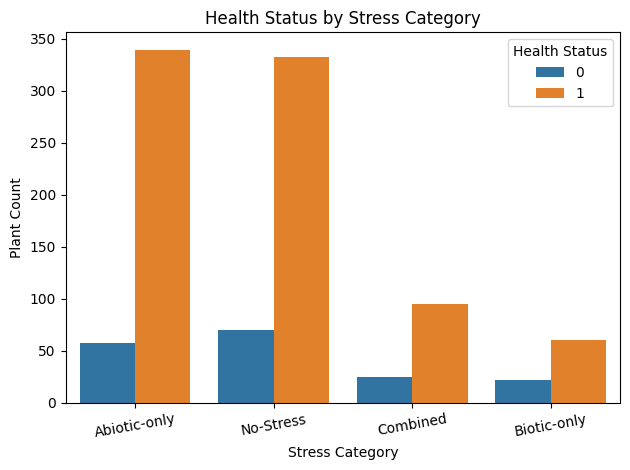

In [56]:
sns.countplot(x="Stress_Category", hue="Health_Status", data=df_cleaned)
plt.title("Health Status by Stress Category")
plt.xlabel("Stress Category")
plt.ylabel("Plant Count")
plt.legend(title="Health Status")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

A better way to visualize this is to look at the proportions

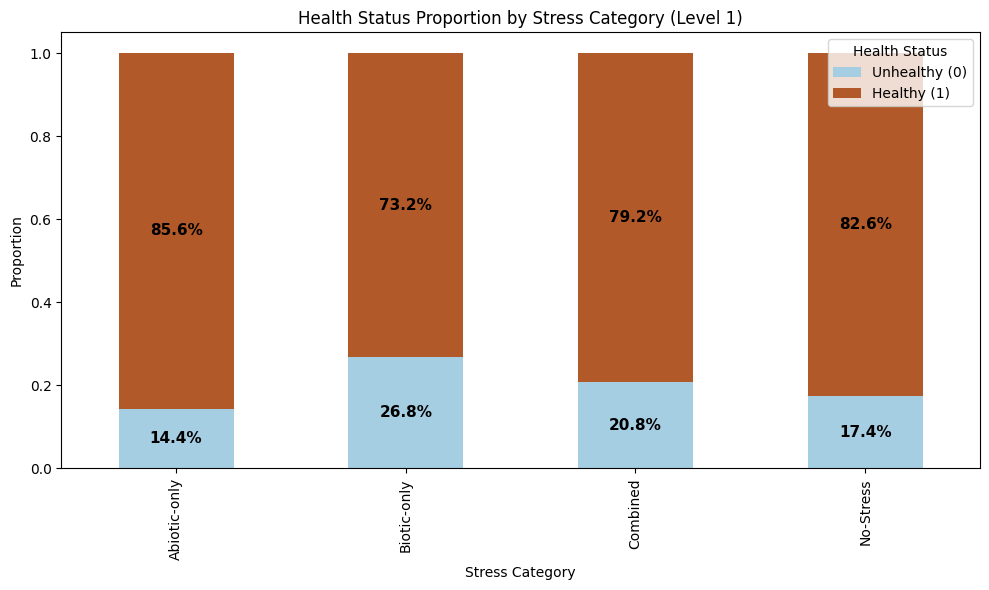

In [57]:
# Proportion by Stress Category
proportion = df_cleaned.groupby('Stress_Category')['Health_Status'].value_counts(normalize=True).unstack()

# Plot stacked bar
ax = proportion.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))

plt.title('Health Status Proportion by Stress Category (Level 1)')
plt.ylabel('Proportion')
plt.xlabel('Stress Category')

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.annotate(f"{height * 100:.1f}%", (x, y), ha='center', va='center', color='black', fontsize=11, weight='bold')

plt.legend(title='Health Status', labels=['Unhealthy (0)', 'Healthy (1)'])
plt.tight_layout()
plt.show()

In [58]:
# Calculate percentage of each health status (0 = unhealthy, 1 = healthy) within each Stress_Category
health_by_category = (
    df_cleaned.groupby("Stress_Category")["Health_Status"]
    .value_counts(normalize=True)
    .unstack()
)

# Convert to percentage
health_by_category_percent = (health_by_category * 100).round(1)

health_by_category_percent

Health_Status,0,1
Stress_Category,,
Abiotic-only,14.4,85.6
Biotic-only,26.8,73.2
Combined,20.8,79.2
No-Stress,17.4,82.6


Let's take a look at the percentage populations of plant health per stress category
to have a better inference

In [59]:
df_cleaned.groupby("Stress_Category")["Total_Stress_L1b"].mean().round(2)

Stress_Category
Abiotic-only    1.22
Biotic-only     1.04
Combined        2.35
No-Stress       0.00
Name: Total_Stress_L1b, dtype: float64

*Key Insights*

- As expected, most plants are healthy under No-Stress.
- For Abiotic only, majority of plants are healthy - tolerable stress
- Biotic only causes more stress than abiotic alone.
- As backed by numerical evidence, Biotic-only stress has highest risk per 
plant, not Combined (which would be true, theoretically)

---

### Take-aways

Let's recapitulate what we have achieved until now and also 
revisit our formulated Hypotheses 1 and 2

**Hypothesis 1: Combined Stressor Impact**

Statement:

**Plants exposed to combined abiotic and biotic stressors experience higher health risks.**

Validations done in your notebook:

1. Total_Stress_L1 Calculation

    - We calculated Total_Stress_L1b as the sum of four abiotic stress indicators.

    - Later, we created Total_Stress_L1b which also included biotic stress.

2. Stress Category Creation

    - We categorized plants as: Abiotic-only, Biotic-only, Combined, No-Stress.

3. Bar Plot of Health Status vs Stress Category

    - You plotted the count of healthy/unhealthy plants per category.

    - It showed that plants in Combined stress had a higher proportion of 
    unhealthy plants despite smaller absolute count.

4. Group-wise Mean Total Stress Score

`df_cleaned.groupby('Stress_Category')['Total_Stress_L1b'].mean()`
`→ Result: Combined = 2.35, higher than Abiotic-only (1.22) and Biotic-only (1.04).`

This supports your Hypothesis 1 with numeric evidence.


**Hypothesis 2: Differential Impact of Stress Types**

Statement:

**Biotic stressors cause more significant health decline compared to abiotic stressors.**

Validations done:

1. Stress Category Bar Plot

    - The proportion of unhealthy plants was higher in Biotic-only category than Abiotic-only.

2. Total Stress Score Comparison

    - Biotic-only mean stress score: 1.04

    - Abiotic-only mean stress score: 1.22

    - However, proportion of unhealthy plants in Biotic-only category was visibly 
    high despite smaller count.

This hints that Biotic stress has a stronger direct effect on health status 
compared to Abiotic stress, however need further validation

In [60]:
# Writing Level 1 encoding features to file

level1_path = "data/encoded/plant_health_cleaned_level1.csv"
df_cleaned.to_csv(level1_path, index=False)

---

## Level 2 Encoding: Zoning (Threshold-Based Binning)


In this subsection, we will

1. **Zone the microclimatic variables** into **categories(low, optimal, high)**
using `pd.cut()`:
    - Soil Moisture
    - Temperature
    - Humidity
    - Light Intensity

2. **Create new encoded columns** for moisture, temperature, humidity and light
zones

3. Depending on the above, create zone based stress scores for Biotic and Abiotic flags

4. Re-validate Hypotheses 1 & 2, and validate Hypothesis 3
(Compare with Level 1)


In [61]:
# Let's check again the columns for df_cleaned data
df_cleaned.head()

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status,Soil_Moisture,...,Light_Stress,Nutrient_Stress,Total_Stress_L1a,Disease_Presence,Pest_Infestation,Abiotic_Stress_Score,Biotic_Stress_Score,Total_Stress_L1b,Dominant_Stress_Type,Stress_Category
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0,0.348723,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1,0.428322,...,0,0,0,0,0,0,0,0,None,No-Stress
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1,0.331137,...,0,0,0,0,0,0,0,0,None,No-Stress
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1,0.403806,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1,0.165958,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only


We will start from the clean dataset again

### Step 1. Load Cleaned Dataset

In [62]:
cleaned_path = "data/cleaned/plant_moniter_health_data_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_path)

In [63]:
print(df_cleaned.isnull().sum())

Plant_ID               0
Temperature_C          0
Humidity_%             0
Soil_Moisture_%        0
Soil_pH                0
Nutrient_Level         0
Light_Intensity_lux    0
Health_Score           0
Health_Status          0
dtype: int64


In [64]:
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(
    df_cleaned[numeric_cols].median()
)

### Step 2. Zone-based Encoding

In [65]:
# Moisture Zone
df_cleaned['Moisture_Zone'] = pd.cut(df_cleaned['Soil_Moisture_%'],
                                     bins=[0, 30, 70, 100],
                                     labels=['Low', 'Optimal', 'High'])

# Fill missing zone values (2 missing)
median_moisture = df_cleaned['Soil_Moisture_%'].median()
median_zone = 'Optimal' if median_moisture <= 70 else 'High'
df_cleaned['Moisture_Zone'].fillna(median_zone, inplace=True)

In [66]:
missing_count = df_cleaned["Moisture_Zone"].isna().sum()
print(f"Filling {missing_count} missing Moisture_Zone values with '{median_zone}' zone")
df_cleaned["Moisture_Zone"] = df_cleaned["Moisture_Zone"].fillna(median_zone)

# Temperature Zone
df_cleaned['Temperature_Zone'] = pd.cut(df_cleaned['Temperature_C'],
                                        bins=[0, 20, 30, 50],
                                        labels=['Low', 'Optimal', 'High'])

# Humidity Zone
df_cleaned['Humidity_Zone'] = pd.cut(df_cleaned['Humidity_%'],
                                     bins=[0, 40, 70, 100],
                                     labels=['Low', 'Optimal', 'High'])

# Light Zone
df_cleaned['Light_Zone'] = pd.cut(df_cleaned['Light_Intensity_lux'],
                                  bins=[0, 15000, 25000, 35000],
                                  labels=['Low', 'Optimal', 'High'])

Filling 0 missing Moisture_Zone values with 'Optimal' zone


In [67]:
print(df_cleaned.isnull().sum())

Plant_ID               0
Temperature_C          0
Humidity_%             0
Soil_Moisture_%        0
Soil_pH                0
Nutrient_Level         0
Light_Intensity_lux    0
Health_Score           0
Health_Status          0
Moisture_Zone          0
Temperature_Zone       0
Humidity_Zone          0
Light_Zone             0
dtype: int64


In [68]:
df_cleaned.head()

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status,Moisture_Zone,Temperature_Zone,Humidity_Zone,Light_Zone
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0,Optimal,Optimal,High,Optimal
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1,Optimal,Optimal,Optimal,Optimal
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1,Optimal,Optimal,Optimal,Low
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1,Optimal,Optimal,Optimal,Optimal
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1,Low,Optimal,Optimal,Optimal


### Step 3. Calculate Zone-Based Stress Scores

In [69]:
# Abiotic Stress: If Zone is Low or High → Stress
zone_cols = ['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 'Light_Zone']

for col in zone_cols:
    df_cleaned[f'{col}_Stress'] = df_cleaned[col].apply(lambda x: 1 if x in ['Low', 'High'] else 0)

# Abiotic Stress Score
df_cleaned['Abiotic_Stress_Score_L2'] = df_cleaned[[f'{col}_Stress' for col in zone_cols]].sum(axis=1)


### Step 4. Simulate Biotic Stress

In [70]:
# Re-simulate Biotic Factors
def simulate_disease(row):
    if row['Humidity_%'] > 70 and 20 <= row['Temperature_C'] <= 30:
        return np.random.choice([0, 1], p=[0.4, 0.6])
    else:
        return np.random.choice([0, 1], p=[0.95, 0.05])

def simulate_pest(row):
    if row['Nutrient_Level'] < 30 or row['Temperature_C'] > 35:
        return np.random.choice([0, 1], p=[0.3, 0.7])
    else:
        return np.random.choice([0, 1], p=[0.95, 0.05])

df_cleaned['Disease_Presence'] = df_cleaned.apply(simulate_disease, axis=1)
df_cleaned['Pest_Infestation'] = df_cleaned.apply(simulate_pest, axis=1)

# Biotic Stress Score
df_cleaned['Biotic_Stress_Score_L2'] = df_cleaned[['Disease_Presence', 'Pest_Infestation']].sum(axis=1)

# Total Stress Score
df_cleaned['Total_Stress_Score_L2'] = df_cleaned['Abiotic_Stress_Score_L2'] + df_cleaned['Biotic_Stress_Score_L2']

# Stress Category Assignment
def stress_category(row):
    if row['Abiotic_Stress_Score_L2'] > 0 and row['Biotic_Stress_Score_L2'] == 0:
        return 'Abiotic-only'
    elif row['Abiotic_Stress_Score_L2'] == 0 and row['Biotic_Stress_Score_L2'] > 0:
        return 'Biotic-only'
    elif row['Abiotic_Stress_Score_L2'] > 0 and row['Biotic_Stress_Score_L2'] > 0:
        return 'Combined'
    else:
        return 'No-Stress'

df_cleaned['Stress_Category'] = df_cleaned.apply(stress_category, axis=1)

In [71]:
df_cleaned.head(10)

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status,Moisture_Zone,...,Moisture_Zone_Stress,Temperature_Zone_Stress,Humidity_Zone_Stress,Light_Zone_Stress,Abiotic_Stress_Score_L2,Disease_Presence,Pest_Infestation,Biotic_Stress_Score_L2,Total_Stress_Score_L2,Stress_Category
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0,Optimal,...,0,0,1,0,1,0,0,0,1,Abiotic-only
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1,Optimal,...,0,0,0,1,1,0,0,0,1,Abiotic-only
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1,Low,...,1,0,0,0,1,0,0,0,1,Abiotic-only
5,Plant_6,24.297589,63.934854,48.199406,5.832259,55.925673,16177.303643,88.371545,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
6,Plant_7,29.737638,68.951932,45.018082,6.743018,22.956084,23145.447953,76.788410,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
7,Plant_8,27.302304,66.351718,32.743671,5.726348,43.701154,21463.324463,64.143743,0,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
8,Plant_9,23.591577,70.495527,54.888685,7.041346,45.117262,17797.300034,91.400678,1,Optimal,...,0,0,1,0,1,0,0,0,1,Abiotic-only
9,Plant_10,26.627680,54.647648,59.063552,6.264438,56.333268,19575.411088,71.629099,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress


In [72]:
df_cleaned.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status', 'Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone',
       'Light_Zone', 'Moisture_Zone_Stress', 'Temperature_Zone_Stress',
       'Humidity_Zone_Stress', 'Light_Zone_Stress', 'Abiotic_Stress_Score_L2',
       'Disease_Presence', 'Pest_Infestation', 'Biotic_Stress_Score_L2',
       'Total_Stress_Score_L2', 'Stress_Category'],
      dtype='object')

### Step 5: Save Level 2 Encoded Data

In [73]:
level2_path = "data/encoded/plant_health_cleaned_level2.csv"
df_cleaned.to_csv(level2_path, index=False)

print(f" Level 2 cleaned dataset saved at: {level2_path}")

 Level 2 cleaned dataset saved at: data/encoded/plant_health_cleaned_level2.csv


### Step 6: Visualizations

<Figure size 1000x600 with 0 Axes>

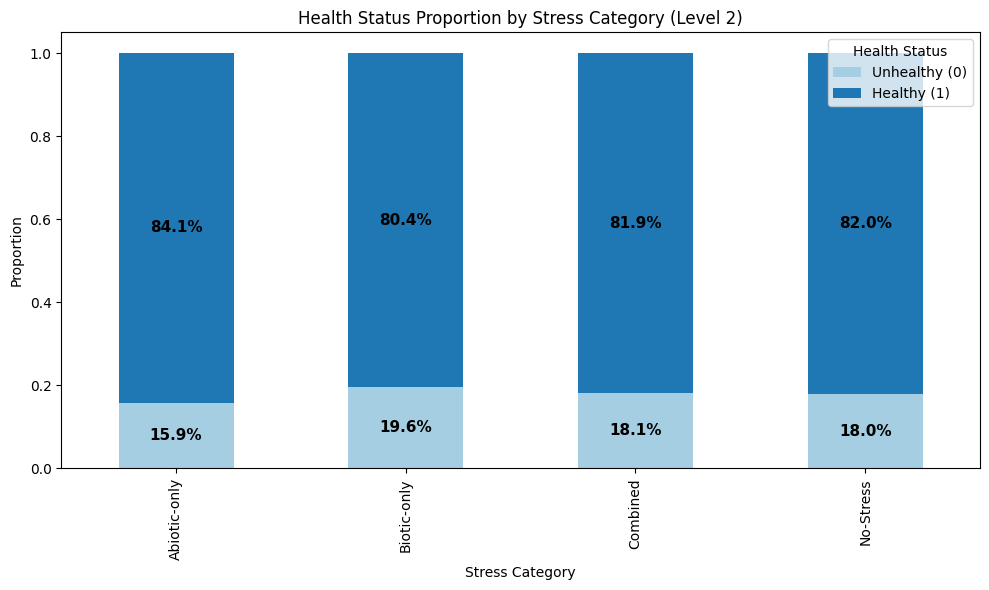

In [74]:
# 1.Proportion by Stress Category
# Group by Stress Category
proportion = df_cleaned.groupby('Stress_Category')['Health_Status'].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Paired')

ax = proportion.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title('Health Status Proportion by Stress Category (Level 2)')
plt.ylabel('Proportion')
plt.xlabel('Stress Category')

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.annotate(f"{height * 100:.1f}%", (x, y), ha='center', va='center', color='black', fontsize=11, weight='bold')

plt.legend(title='Health Status', labels=['Unhealthy (0)', 'Healthy (1)'])
plt.tight_layout()
plt.show()


In [76]:
# Calculate percentage of each health status (0 = unhealthy, 1 = healthy) within each Stress_Category
health_by_category = (
    df_cleaned.groupby("Stress_Category")["Health_Status"]
    .value_counts(normalize=True)
    .unstack()
)

# Convert to percentage
health_by_category_percent = (health_by_category * 100).round(1)

health_by_category_percent

Health_Status,0,1
Stress_Category,,
Abiotic-only,15.9,84.1
Biotic-only,19.6,80.4
Combined,18.1,81.9
No-Stress,18.0,82.0


From the proportions shown in the above plot, and table, we can validate that
**Biotic factors affect health significantly, re-validating Hypothesis 2**

In [77]:
df_cleaned.groupby("Stress_Category")["Total_Stress_Score_L2"].mean().round(2)

Stress_Category
Abiotic-only    1.18
Biotic-only     1.04
Combined        2.34
No-Stress       0.00
Name: Total_Stress_Score_L2, dtype: float64

**The above shows the Combined Stressors increase plant health risk, re-validating
Hypothesis 1**

C:\Users\baner\AppData\Local\Temp\ipykernel_21560\2484880655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_moisture = df_cleaned.groupby('Humidity_Zone')['Health_Status'].value_counts(normalize=True).unstack()


<Figure size 1000x600 with 0 Axes>

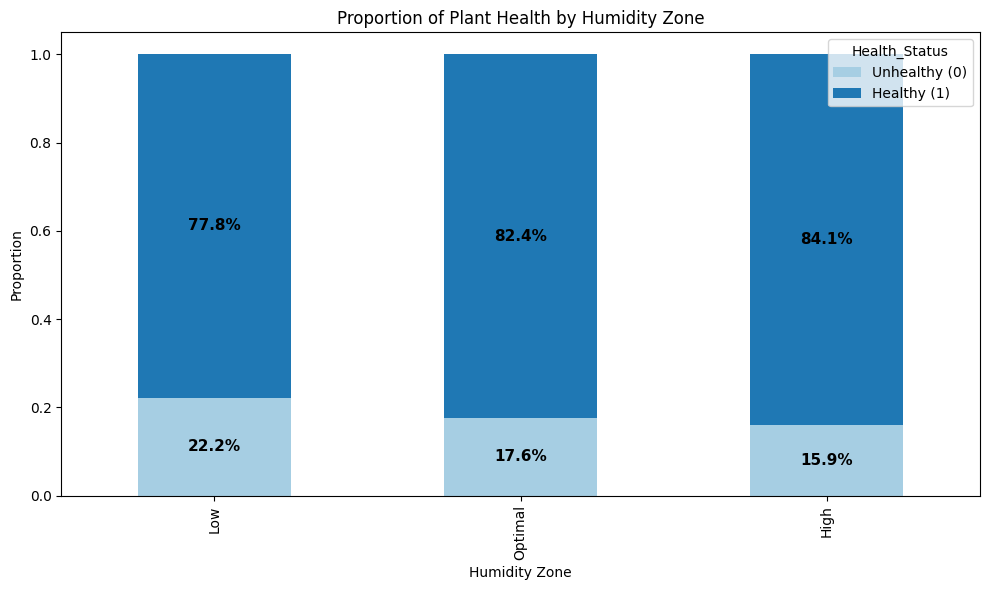

In [79]:
# Calculate proportions
prop_moisture = df_cleaned.groupby('Humidity_Zone')['Health_Status'].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Paired')

ax = prop_moisture.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))

plt.title('Proportion of Plant Health by Humidity Zone')
plt.ylabel('Proportion')
plt.xlabel('Moisture Zone')

# Annotate percentages on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.annotate(f"{height * 100:.1f}%", (x, y), ha='center', va='center', color='black', fontsize=11, weight='bold')


plt.legend(title='Health_Status', labels=['Unhealthy (0)', 'Healthy (1)'])
plt.tight_layout()
plt.show()

Instead of plotting the proportion of healthy/ unhealthy for zonal columns one by one, let's create a for loop to iterate through all the zonal columns

C:\Users\baner\AppData\Local\Temp\ipykernel_21560\3363490205.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_cleaned.groupby(zone)['Health_Status'].value_counts(normalize=True).unstack()


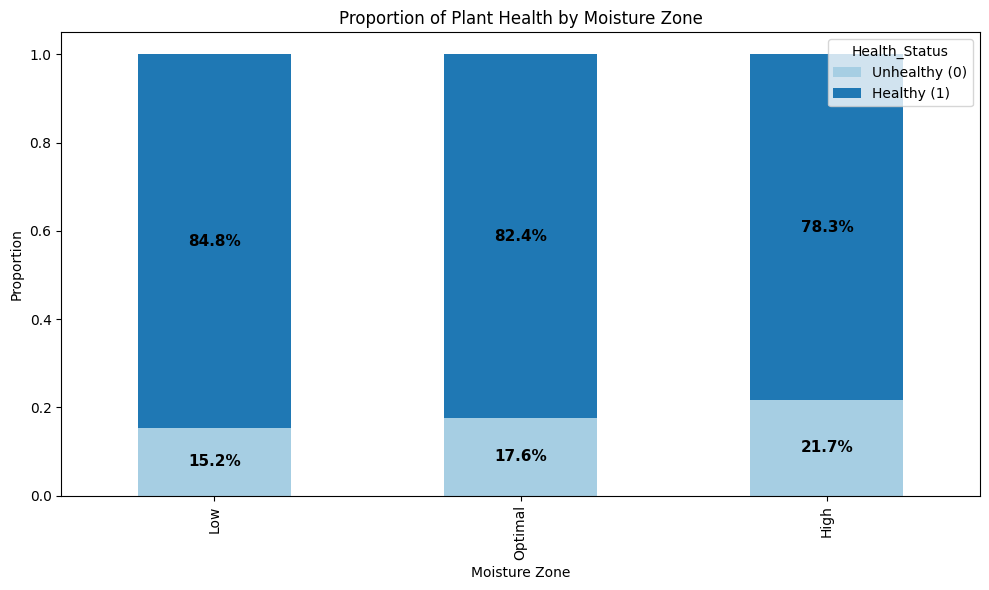

C:\Users\baner\AppData\Local\Temp\ipykernel_21560\3363490205.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_cleaned.groupby(zone)['Health_Status'].value_counts(normalize=True).unstack()


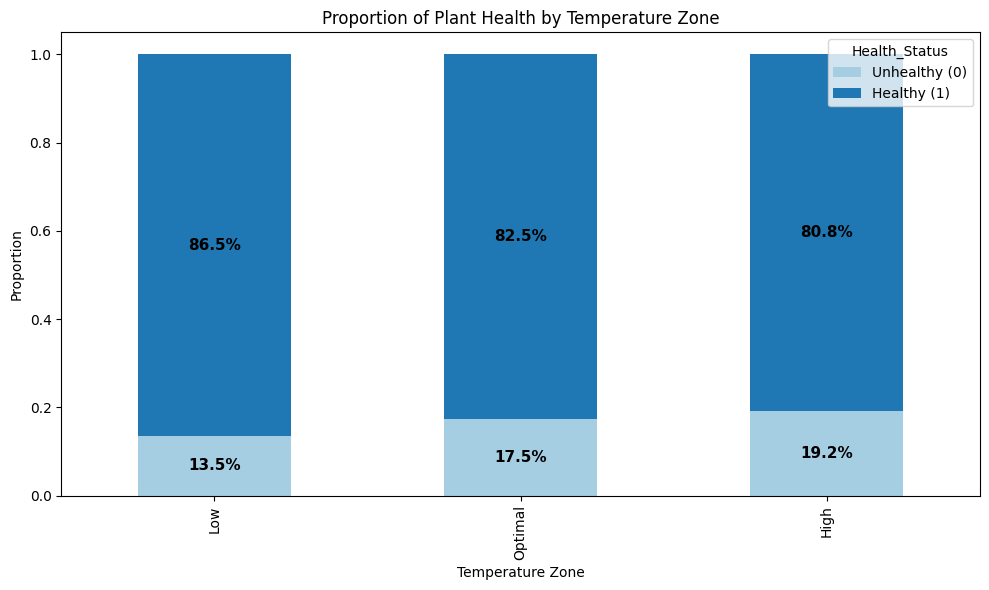

C:\Users\baner\AppData\Local\Temp\ipykernel_21560\3363490205.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_cleaned.groupby(zone)['Health_Status'].value_counts(normalize=True).unstack()


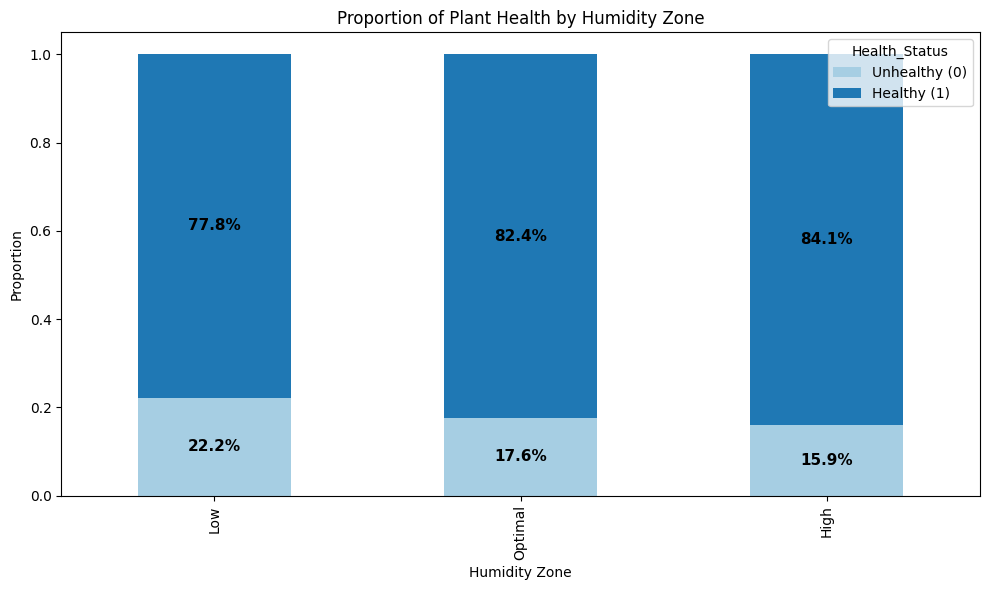

C:\Users\baner\AppData\Local\Temp\ipykernel_21560\3363490205.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_cleaned.groupby(zone)['Health_Status'].value_counts(normalize=True).unstack()


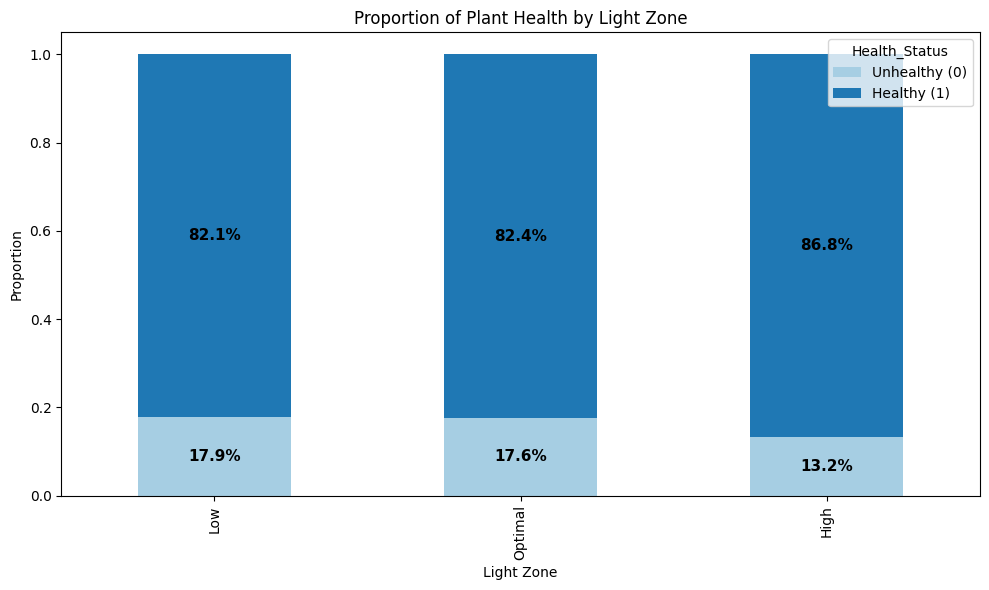

In [80]:
zone_columns = ['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 'Light_Zone']
colors = sns.color_palette('Paired')

for zone in zone_columns:
    # Calculate proportions
    proportions = df_cleaned.groupby(zone)['Health_Status'].value_counts(normalize=True).unstack()

    # Plot
    ax = proportions.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))

    plt.title(f'Proportion of Plant Health by {zone.replace("_", " ")}')
    plt.ylabel('Proportion')
    plt.xlabel(zone.replace("_", " "))

    # Annotate percentages on bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            ax.annotate(f"{height * 100:.1f}%", 
                        (x, y), ha='center', va='center', 
                        color='black', fontsize=11, weight='bold')

    plt.legend(title='Health_Status', labels=['Unhealthy (0)', 'Healthy (1)'])
    plt.tight_layout()
    plt.show()

**Hypothesis 3 stating that plants in optimal moisture, temperature and humidity
is broadly supported.** There are specific exception though, e.g. slightly better
outcomes in high light conditions reveal intersting nuances that require further 
investigation

C:\Users\baner\AppData\Local\Temp\ipykernel_21560\4162219562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_level2[col] = corr_level2[col].map({'Low': 0, 'Optimal': 1, 'High': 2})
C:\Users\baner\AppData\Local\Temp\ipykernel_21560\4162219562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_level2[col] = corr_level2[col].map({'Low': 0, 'Optimal': 1, 'High': 2})
C:\Users\baner\AppData\Local\Temp\ipykernel_21560\4162219562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

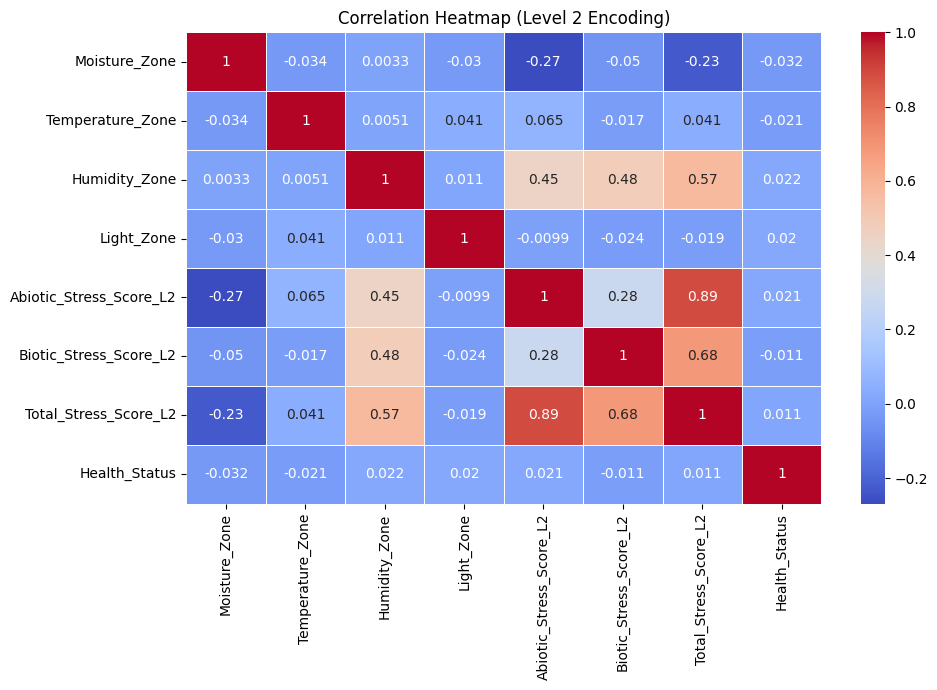

In [82]:
# Selecting relevant Level 2 encoded columns for correlation
corr_level2 = df_cleaned[['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 
                          'Light_Zone', 'Abiotic_Stress_Score_L2', 
                          'Biotic_Stress_Score_L2', 'Total_Stress_Score_L2', 
                          'Health_Status']]

# Convert categorical zone variables to numerical (if needed)
for col in ['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 'Light_Zone']:
    corr_level2[col] = corr_level2[col].map({'Low': 0, 'Optimal': 1, 'High': 2})

corr_matrix = corr_level2.corr()

# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Level 2 Encoding)')
plt.tight_layout()
plt.show()


*Key Insights*

- **Strong correlation among stress scores**
    - High correlation between Abiotic, Biotic and Total stress scores,
    validating the combined stressor hyothesis
- **Environmental Zones Influence on Stress**
    - Positive correlation between humidity and all stress scores indicates
    that humidity significantly impacts stress.
    - Negative correlation between moisture and Abiotic (-0.27) and 
    Total stress scores (-0.23) implies that as moisture conditions move from
    low -> optimal -> high, abiotic and total stress scores decrease.
    - Temperature and Light zones show weaker correlations with stress scores.





---

### Take-aways

- Transition from binary (Level 1) to zone-based (Level 2) encoding significantly
 improved the interpretability of environmental stress factors and their impacts 
 on plant health.

- All the three hypotheses were validated

- Optimal moisture and humidity zones consistently correlate with lower stress
 scores and better plant health outcomes

- From correlation inisghts, abiotic stress strongly drives total stress score,
biotic factors also contribute notably.

- Humidity shows strongest relationship with overall stress scores



---

# Conclusion 

The ETL pipeline successfully transformed the raw plant sensor data into a cleaned and feature-enriched dataset, ready for analysis and visualization.

Key accomplishments include:

- Data Cleaning: Removed duplicates, handled missing values, standardized column names.

- Level 1 Encoding (Binary): Encoded abiotic and biotic stressors based on threshold rules.

- Level 2 Encoding (Zone-Based): Introduced zonal categorization for microclimatic variables (Temperature, Humidity, Light, Moisture) to better capture environmental stress.

- Stress Score Calculation: Computed Abiotic, Biotic, and Total Stress Scores for each plant.

- Stress Category Generation: Categorized plants into Abiotic-only, Biotic-only, Combined, and No-Stress conditions.

- Data Export: Cleaned and encoded datasets stored for downstream analysis and visualization.

This structured pipeline provides a strong foundation to evaluate stress impacts on plant health.

---

# Future Outlook

The current ETL framework can be further extended and improved in the following directions:

1. Add Interaction Features
    Include interaction terms such as Abiotic × Biotic interactions to capture compound stress effects.

2. Time-Series Simulation
    Incorporate plant growth stage data to monitor how stress evolves over time.

3. Real-World Biotic Data Integration
    Enhance biotic stress simulation by integrating actual pest/disease data from VOC sensors or pest databases.

4. Predictive Modeling
Develop simple classification models (e.g., Logistic Regression, Random Forest)
 to predict plant health status based on engineered features like stress scores
  and microclimate zones.

Future work may include hyperparameter tuning, testing alternative classifiers,
 and incorporating real-world data to improve model performance and generalizability.

4. Interactive Dashboard Development
    Build a Streamlit-based interactive dashboard for real-time visualization 
    and exploration of stress indicators.

5. Automation of ETL Process
    Package the ETL pipeline into an automated CLI-based script or Python module
     to support scalability and reproducibility.